In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 2
record = 10000

X_sols = np.loadtxt("C:/Users/cilli/DIAS.cpp/testing/X_file.txt",dtype = tuple,delimiter = ":")
V_sols = np.loadtxt("C:/Users/cilli/DIAS.cpp/testing/V_file.txt", dtype = tuple, delimiter = ":")

In [3]:
str_X1 = X_sols[:record]
str_X2 = X_sols[record:2*record]

str_V1 = V_sols[:record]
str_V2 = V_sols[record:2*record]

X1,X2 = np.zeros([2,record,N,N], dtype = complex)
V1,V2 = np.zeros([2,record,N,N], dtype = complex)

for i in np.arange(len(X1)):
    for k in np.arange(N):
        for j in np.arange(N):
            
            current_X1 = np.array(str_X1[i].replace("(","").replace(")"," ").split(),dtype = str).reshape(2,2)
            current_X2 = np.array(str_X2[i].replace("(","").replace(")"," ").split(),dtype = str).reshape(2,2)
            
            X1[i][k][j] = complex(float(current_X1[k][j].split(",")[0]), float(current_X1[k][j].split(",")[1]))
            X2[i][k][j] = complex(float(current_X2[k][j].split(",")[0]), float(current_X2[k][j].split(",")[1]))
            
            current_V1 = np.array(str_V1[i].replace("(","").replace(")"," ").split(),dtype = str).reshape(2,2)
            current_V2 = np.array(str_V2[i].replace("(","").replace(")"," ").split(),dtype = str).reshape(2,2)
            
            V1[i][k][j] = complex(float(current_V1[k][j].split(",")[0]), float(current_V1[k][j].split(",")[1]))
            V2[i][k][j] = complex(float(current_V2[k][j].split(",")[0]), float(current_V2[k][j].split(",")[1]))

In [4]:
L2_X1 = np.zeros(len(X1))
L2_X2 = np.zeros(len(X2))
L2_V1 = np.zeros(len(V1))
L2_V2 = np.zeros(len(V2))

for i in np.arange(len(X1)):
    L2_X1[i] = np.linalg.norm(X1[i])
    L2_X2[i] = np.linalg.norm(X2[i])
    L2_V1[i] = np.linalg.norm(V1[i])
    L2_V2[i] = np.linalg.norm(V2[i])

t = np.linspace(0,1000,int(1e4))

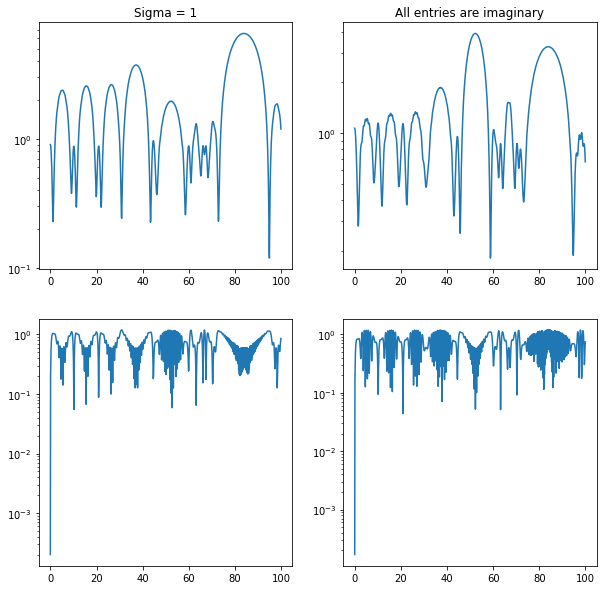

In [5]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.plot(t[:1000],L2_X1[:1000])
plt.yscale("log")
plt.title("Sigma = 1")

plt.subplot(2,2,2)
plt.plot(t[:1000],L2_X2[:1000])
plt.yscale("log")

plt.subplot(2,2,3)
plt.plot(t[:1000],L2_V1[:1000])
plt.yscale("log")

plt.subplot(2,2,4)
plt.plot(t[:1000],L2_V2[:1000])
plt.yscale("log")
